In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.tri as tri
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import statsmodels.api as sm
%matplotlib inline

In [3]:
colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
# old results
sfco_path = '~/sims_n_results/nucmoles_opusupdate_aug2019/sfco/'
# new results
sfco15_path = '~/sims_n_results/simupdates_aug2020/sfco15/'
sfco29_path = '~/sims_n_results/simupdates_aug2020/sfco29/'

In [5]:
uncs = [0.05, 0.1, 0.15, 0.2]
job_dirs = ['Job' + str(i) + '_unc' + str(unc) for i, unc in enumerate(uncs)]
dfs = {}
for i, unc_job in enumerate(job_dirs):
    dfs['sfco_' + str(i)] = pd.read_csv(sfco_path + unc_job + '/' + unc_job + '.csv')
    dfs['sfco15_' + str(i)] = pd.read_csv(sfco15_path + unc_job + '/' + unc_job + '.csv')
    dfs['sfco29_' + str(i)] = pd.read_csv(sfco29_path + unc_job + '/' + unc_job + '.csv')
# for ease of testing things
sfco = dfs['sfco_0']
sfco15 = dfs['sfco15_0']
sfco29 = dfs['sfco29_0']

In [6]:
dfs.keys()

dict_keys(['sfco_0', 'sfco15_0', 'sfco29_0', 'sfco_1', 'sfco15_1', 'sfco29_1', 'sfco_2', 'sfco15_2', 'sfco29_2', 'sfco_3', 'sfco15_3', 'sfco29_3'])

In [7]:
sfco15.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'sim_idx', 'ReactorType', 'CoolingTime',
       'Enrichment', 'Burnup', 'OrigenReactor', 'pred_idx', 'pred_ReactorType',
       'pred_CoolingTime', 'pred_Enrichment', 'pred_Burnup',
       'pred_OrigenReactor', 'AvgPowerDensity', 'ModDensity', 'UiWeight',
       'MaxLogLL', 'MaxLLUnc', '2ndMaxLogLL', '2ndMaxLLUnc',
       'CDF_LogLL_0.9998', 'CDF_LLUnc_0.9998', 'CDF_LogLL_0.9988',
       'CDF_LLUnc_0.9988', 'CDF_LogLL_0.95', 'CDF_LLUnc_0.95', 'CDF_LogLL_0.9',
       'CDF_LLUnc_0.9', 'CDF_LogLL_0.5', 'CDF_LLUnc_0.5', 'CDF_LogLL_0.1',
       'CDF_LLUnc_0.1', 'CDF_LogLL_0.01', 'CDF_LLUnc_0.01',
       'ReactorType_Score', 'CoolingTime_Error', 'Enrichment_Error',
       'Burnup_Error', 'OrigenReactor_Score'],
      dtype='object')

In [8]:
for dfname in list(dfs.keys()):
    df = dfs[dfname]
    df['AdjDiff'] = df['MaxLogLL'] - df['2ndMaxLogLL']
    df['RelAdjDiff_MinLL0.01'] = df['AdjDiff'] / (df['MaxLogLL']  - df['CDF_LogLL_0.01'])
    df['RelAdjDiff_MinLL0.1'] = df['AdjDiff'] / (df['MaxLogLL']  - df['CDF_LogLL_0.1'])
    df['Percent_Burnup_Error'] = df['Burnup_Error'] / df['Burnup']
    
    #df['Percent_CoolingTime_Error'] = df['CoolingTime_Error'] / df['CoolingTime']
    #df['Percent_CoolingTime_Error'] = df['Percent_CoolingTime_Error'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Explore Burnup and Enrichment Errors

In [9]:
# old
print(sfco['Percent_Burnup_Error'].describe())
# new
print(sfco15['Percent_Burnup_Error'].describe())
print(sfco29['Percent_Burnup_Error'].describe())

count    544.000000
mean       0.332184
std        0.285241
min        0.000074
25%        0.193478
50%        0.297102
75%        0.393373
max        2.743641
Name: Percent_Burnup_Error, dtype: float64
count    505.000000
mean       0.187539
std        0.155398
min        0.000408
25%        0.058485
50%        0.153846
75%        0.298556
max        1.503097
Name: Percent_Burnup_Error, dtype: float64
count    505.000000
mean       0.151887
std        0.195778
min        0.000031
25%        0.036301
50%        0.087295
75%        0.183161
max        1.440513
Name: Percent_Burnup_Error, dtype: float64


In [10]:
# old
print(sfco['Enrichment_Error'].describe())
# new
print(sfco15['Enrichment_Error'].describe())
print(sfco29['Enrichment_Error'].describe())

count    544.000000
mean       1.822317
std        1.079040
min        0.000000
25%        0.940000
50%        1.870000
75%        2.590000
max        4.400000
Name: Enrichment_Error, dtype: float64
count    505.000000
mean       1.103471
std        0.814116
min        0.000000
25%        0.465000
50%        0.961000
75%        1.770000
max        4.400000
Name: Enrichment_Error, dtype: float64
count    505.000000
mean       0.481465
std        0.590842
min        0.000000
25%        0.140000
50%        0.250000
75%        0.610000
max        3.380000
Name: Enrichment_Error, dtype: float64


In [11]:
sfco15.loc[sfco15['Percent_Burnup_Error'] > 0.5]

Unnamed: 0  Unnamed: 0.1                sim_idx ReactorType  CoolingTime  \
24            0             0     FDN-1|2F1ZN2|C3|UB         bwr          0.0   
49            0             0   FDN-2|2F2D8|H5|TU503         bwr          0.0   
54            0             0      GAR-1|SA-13|E6|11         bwr          0.0   
55            0             0      GAR-1|SA-13|E6|13         bwr          0.0   
64            0             0       GAR-1|A-106|C3|1         bwr          0.0   
202           0             0         NOV-4|213|25|9         pwr          0.0   
236           0             0         NPD-1|1022|A|1        phwr          0.0   
284           0             0  OBR-1|BE210|G14|P5(1)         pwr          0.0   
287           0             0      OBR-1|BE124|G7|P3         pwr          0.0   

     Enrichment   Burnup                                OrigenReactor  \
24        4.900  47490.0                        Fukushima-Daini-1_BWR   
49        3.400  55600.0                        Fukushima-Daini-2_BWR   
54        2.410   4200.0                             Garigliano-1_BWR   
55        2.410   5580.0                             Garigliano-1_BWR   
64        2.100   9140.0                             Garigliano-1_BWR   
202       3.600  27600.0                      Novovoronezh-4_VVER-440   
236       0.711    791.0  Nuclear Power Demonstration Reactor-1_CANDU   
284       2.830  30100.0                              Obrigheim-1_PWR   
287       3.000  31300.0                              Obrigheim-1_PWR   

     pred_idx pred_ReactorType  ...  CDF_LLUnc_0.01  ReactorType_Score  \
24     312854              pwr  ...       10.744150              False   
49     187444              bwr  ...        6.465958               True   
54     114548              bwr  ...       11.611242               True   
55     171792              bwr  ...       10.701735               True   
64     166978              bwr  ...       19.355840               True   
202    290040              pwr  ...       14.535487               True   
236     30358              bwr  ...       21.115516              False   
284    241572              bwr  ...       13.008660              False   
287    264268              pwr  ...       13.852568               True   

     CoolingTime_Error Enrichment_Error  Burnup_Error  OrigenReactor_Score  \
24         1083.936839            4.390      29159.31                False   
49           21.396677            2.900      28030.03                False   
54          464.008668            2.820       3456.06                False   
55          812.044584            2.700       4120.27                False   
64         7097.519283            2.130       5557.28                False   
202           0.000776            3.100      15765.78                False   
236        6973.335475            2.029       1188.95                False   
284         854.157139            2.220      15282.93                False   
287        2473.486279            2.390      18155.77                False   

      AdjDiff  RelAdjDiff_MinLL0.01  RelAdjDiff_MinLL0.1  Percent_Burnup_Error  
24   0.051969          1.598783e-14         1.565655e-09              0.614009  
49   0.002581          2.124274e-16         2.097353e-11              0.504137  
54   0.005380          5.732911e-11         7.492936e-06              0.822871  
55   0.004150          8.462791e-12         6.756790e-07              0.738400  
64   0.756542          5.433820e-11         5.650270e-06              0.608018  
202  0.000000          0.000000e+00         0.000000e+00              0.571224  
236  0.029809          2.023340e-07         4.163207e-05              1.503097  
284  0.001419          6.410947e-16         6.183577e-11              0.507739  
287  0.065655          3.165612e-14         3.027851e-09              0.580057  

[9 rows x 44 columns]

In [12]:
sfco15.loc[sfco15['Enrichment_Error'] > 2.5]

Unnamed: 0  Unnamed: 0.1                sim_idx ReactorType  CoolingTime  \
16            0             0  COO-1|CZ346|ADD2974|J         bwr          0.0   
24            0             0     FDN-1|2F1ZN2|C3|UB         bwr          0.0   
26            0             0     FDN-1|2F1ZN3|C3|UT         bwr          0.0   
29            0             0     FDN-1|2F1ZN3|C3|UB         bwr          0.0   
30            0             0     FDN-1|2F1ZN3|C3|UM         bwr          0.0   
38            0             0   FDN-2|2F2D3|H5|TU302         bwr          0.0   
39            0             0   FDN-2|2F2D3|A4|TU306         bwr          0.0   
49            0             0   FDN-2|2F2D8|H5|TU503         bwr          0.0   
50            0             0   FDN-2|2F2D8|A4|TU506         bwr          0.0   
52            0             0   FDN-2|2F2D8|H5|TU502         bwr          0.0   
54            0             0      GAR-1|SA-13|E6|11         bwr          0.0   
55            0             0      GAR-1|SA-13|E6|13         bwr          0.0   
165           0             0     MON-1|MTB099|F6|S5         bwr          0.0   
168           0             0     MON-1|MTB099|F6|S4         bwr          0.0   
202           0             0         NOV-4|213|25|9         pwr          0.0   
293           0             0  OBR-1|BE210|K14|P3(1)         pwr          0.0   

     Enrichment   Burnup            OrigenReactor  pred_idx pred_ReactorType  \
16         2.94  29230.0             Cooper-1_BWR    307073              pwr   
24         4.90  47490.0    Fukushima-Daini-1_BWR    312854              pwr   
26         4.90  59050.0    Fukushima-Daini-1_BWR    295761              pwr   
29         4.90  68250.0    Fukushima-Daini-1_BWR      1205              bwr   
30         4.90  68420.0    Fukushima-Daini-1_BWR    250710              pwr   
38         3.40  31400.0    Fukushima-Daini-2_BWR    244758              pwr   
39         3.40  32300.0    Fukushima-Daini-2_BWR    287604              pwr   
49         3.40  55600.0    Fukushima-Daini-2_BWR    187444              bwr   
50         3.40  57500.0    Fukushima-Daini-2_BWR      1149              bwr   
52         3.40  58900.0    Fukushima-Daini-2_BWR    288008              pwr   
54         2.41   4200.0         Garigliano-1_BWR    114548              bwr   
55         2.41   5580.0         Garigliano-1_BWR    171792              bwr   
165        2.87  32700.0         Monticello-1_BWR    307105              pwr   
168        2.87  44100.0         Monticello-1_BWR    307285              pwr   
202        3.60  27600.0  Novovoronezh-4_VVER-440    290040              pwr   
293        2.83  36600.0          Obrigheim-1_PWR    264384              pwr   

     ...  CDF_LLUnc_0.01  ReactorType_Score  CoolingTime_Error  \
16   ...       14.892814              False        6067.268722   
24   ...       10.744150              False        1083.936839   
26   ...       12.358448              False        1666.272340   
29   ...        7.723472               True          84.338574   
30   ...       23.507767              False        2566.433822   
38   ...        8.733844              False        1407.176700   
39   ...        8.754264              False        2011.587621   
49   ...        6.465958               True          21.396677   
50   ...        7.962375               True         473.850856   
52   ...        8.509588              False         378.041108   
54   ...       11.611242               True         464.008668   
55   ...       10.701735               True         812.044584   
165  ...       13.567201              False        2534.023064   
168  ...       15.892878              False        2534.023064   
202  ...       14.535487               True           0.000776   
293  ...       12.732138               True        2167.091819   

    Enrichment_Error  Burnup_Error  OrigenReactor_Score   AdjDiff  \
16              2.54      11833.62                False  0.008355   
24   

# CDFs

## CDFs of DBs 
### with metrics: 
1. Max LL
2. Relative Burnup Error
3. Enrichment Error

In [13]:
def get_cdf(sample):
    ecdf = sm.distributions.ECDF(sample)
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    return x, y

In [22]:
def plot_db_cdfs(dfname, metric):

    df0 = dfs[dfname + '_0']
    df1 = dfs[dfname + '_1']
    df2 = dfs[dfname + '_2']
    df3 = dfs[dfname + '_3']
    
    x0, y0 = get_cdf(df0[metric])
    x1, y1 = get_cdf(df1[metric])
    x2, y2 = get_cdf(df2[metric])
    x3, y3 = get_cdf(df3[metric])
    
    plt.clf()
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    
    ax.plot(x0, y0, 'o-', color=colors['MBrwn'], mew=0, ms=5, label="5% Uncertainty")
    ax.plot(x1, y1, 'o-', color=colors['MTeal'], mew=0, ms=5, label="10% Uncertainty")
    ax.plot(x2, y2, 'o-', color=colors['MPurp'], mew=0, ms=5, label="15% Uncertainty")
    ax.plot(x3, y3, 'o-', color=colors['DBrwn'], mew=0, ms=5, label="20% Uncertainty")
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')#'right', bbox_to_anchor=(1.4, 0.5))    
    
    title_dict = {'Enrichment_Error' : ['Absolute Enrichment Error', 'Enrichment Error'],
                  'Percent_Burnup_Error' : ['Relative Burnup Error', 'Burnup Error'],
                  'MaxLogLL': ['Max LogLL', 'Maximum Log Likelihood']}
    dftitle = {'sfco': 'SFCOMPO: old results', 'sfco15': 'SFCOMPO: 15 nuc results', 
               'sfco29' : 'SFCOMPO: 29 nuc results'}

    ax.set_xlabel(title_dict[metric][0], fontsize=20, labelpad=15)
    ax.set_ylabel('CDF', fontsize=20, labelpad=15)
    
    title_str = 'CDF for ' + dftitle[dfname]
    subtitle_str = title_dict[metric][1]
    plt.suptitle(title_str, y=1.01, fontsize=15)
    plt.title(subtitle_str, fontsize=15, pad=15)
    
    #ax.set_xlim(-150, 100)
    plt.show()
    
    #fig.savefig('../plots/reladjdiff_min0.1_cdf_' + dfname + '.png', bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

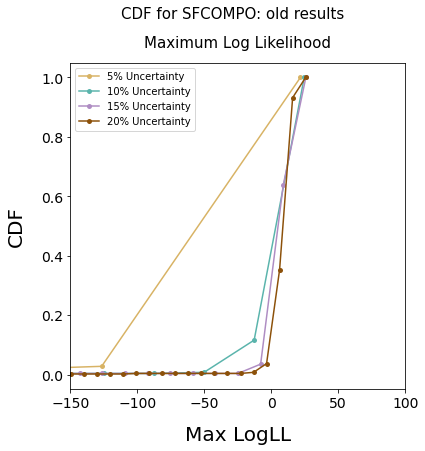

<Figure size 432x288 with 0 Axes>

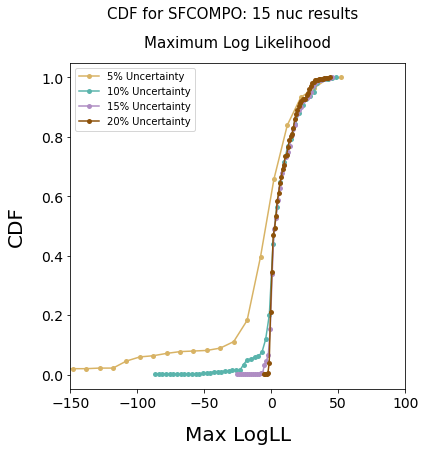

<Figure size 432x288 with 0 Axes>

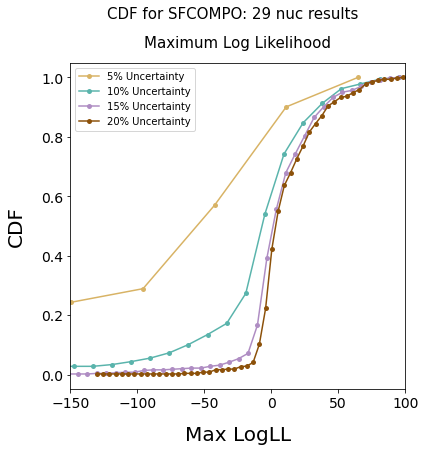

In [21]:
plot_db_cdfs('sfco', 'MaxLogLL')
plot_db_cdfs('sfco15', 'MaxLogLL')
plot_db_cdfs('sfco29', 'MaxLogLL')

<Figure size 432x288 with 0 Axes>

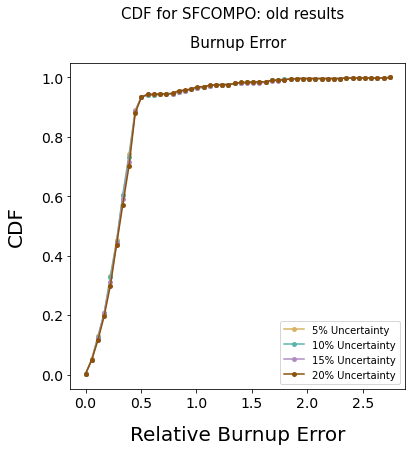

<Figure size 432x288 with 0 Axes>

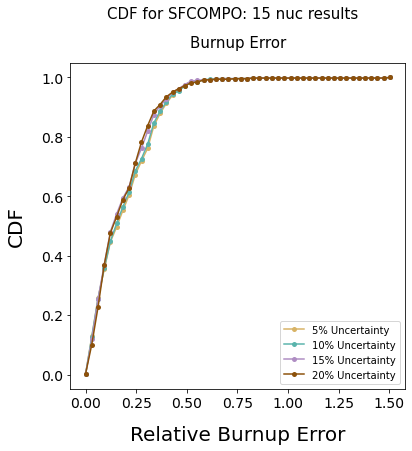

<Figure size 432x288 with 0 Axes>

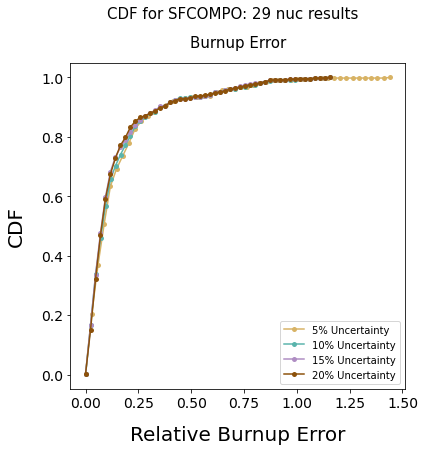

In [23]:
plot_db_cdfs('sfco', 'Percent_Burnup_Error')
plot_db_cdfs('sfco15', 'Percent_Burnup_Error')
plot_db_cdfs('sfco29', 'Percent_Burnup_Error')

<Figure size 432x288 with 0 Axes>

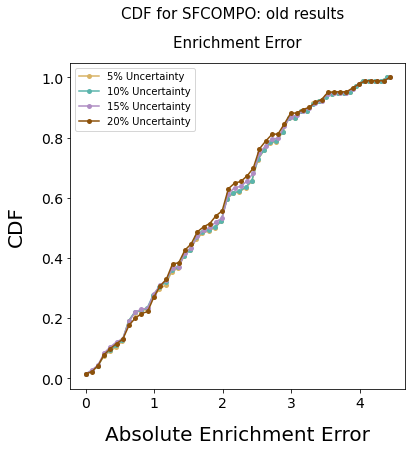

<Figure size 432x288 with 0 Axes>

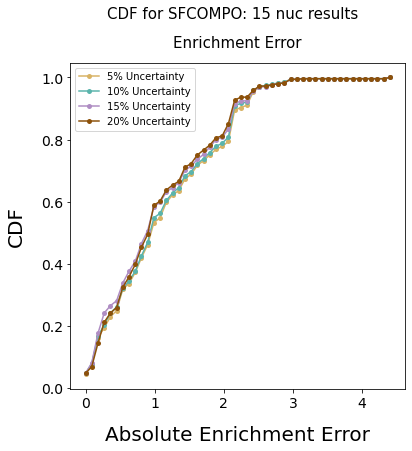

<Figure size 432x288 with 0 Axes>

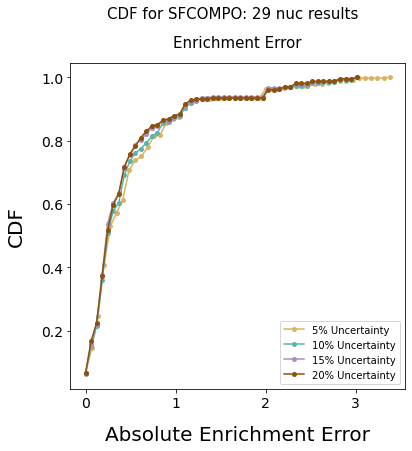

In [24]:
plot_db_cdfs('sfco', 'Enrichment_Error')
plot_db_cdfs('sfco15', 'Enrichment_Error')
plot_db_cdfs('sfco29', 'Enrichment_Error')

## Split CDFs by Reactor Type

In [29]:
def plot_rxtr_cdfs(dfname, metric):

    df0 = dfs[dfname + '_0']
    df1 = dfs[dfname + '_1']
    df2 = dfs[dfname + '_3']
    
    x0_pwr, y0_pwr = get_cdf(df0[metric].loc[df0['ReactorType'] == 'pwr'])
    x0_bwr, y0_bwr = get_cdf(df0[metric].loc[df0['ReactorType'] == 'bwr'])
    x0_hwr, y0_hwr = get_cdf(df0[metric].loc[df0['ReactorType'] == 'phwr'])
    x1_pwr, y1_pwr = get_cdf(df1[metric].loc[df1['ReactorType'] == 'pwr'])
    x1_bwr, y1_bwr = get_cdf(df1[metric].loc[df1['ReactorType'] == 'bwr'])
    x1_hwr, y1_hwr = get_cdf(df1[metric].loc[df1['ReactorType'] == 'phwr'])
    x2_pwr, y2_pwr = get_cdf(df2[metric].loc[df2['ReactorType'] == 'pwr'])
    x2_bwr, y2_bwr = get_cdf(df2[metric].loc[df2['ReactorType'] == 'bwr'])
    x2_hwr, y2_hwr = get_cdf(df2[metric].loc[df2['ReactorType'] == 'phwr'])
    
    plt.clf()
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    
    ax.plot(x0_pwr, y0_pwr, 'o-', color=colors['LBrwn'], mew=0, ms=5, label="PWR, 5% Uncertainty")
    ax.plot(x0_bwr, y0_bwr, 'o-', color=colors['MBrwn'], mew=0, ms=5, label="BWR, 5% Uncertainty")
    ax.plot(x0_hwr, y0_hwr, 'o-', color=colors['DBrwn'], mew=0, ms=5, label="PHWR, 5% Uncertainty")
    ax.plot(x1_pwr, y1_pwr, 'o-', color=colors['LTeal'], mew=0, ms=5, label="PWR, 10% Uncertainty")
    ax.plot(x1_bwr, y1_bwr, 'o-', color=colors['MTeal'], mew=0, ms=5, label="BWR, 10% Uncertainty")
    ax.plot(x1_hwr, y1_hwr, 'o-', color=colors['DTeal'], mew=0, ms=5, label="PHWR, 10% Uncertainty")
    ax.plot(x2_pwr, y2_pwr, 'o-', color=colors['LPurp'], mew=0, ms=5, label="PWR, 20% Uncertainty")
    ax.plot(x2_bwr, y2_bwr, 'o-', color=colors['MPurp'], mew=0, ms=5, label="BWR, 20% Uncertainty")
    ax.plot(x2_hwr, y2_hwr, 'o-', color=colors['DPurp'], mew=0, ms=5, label="PHWR, 20% Uncertainty")
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')
    
    title_dict = {'Enrichment_Error' : ['Absolute Enrichment Error', 'Enrichment Error'],
                  'Percent_Burnup_Error' : ['Relative Burnup Error', 'Burnup Error'],
                  'MaxLogLL': ['Max LogLL', 'Maximum Log Likelihood']}
    dftitle = {'sfco': 'SFCOMPO: old results', 'sfco15': 'SFCOMPO: 15 nuc results', 
               'sfco29' : 'SFCOMPO: 29 nuc results'}

    ax.set_xlabel(title_dict[metric][0], fontsize=20, labelpad=15)
    ax.set_ylabel('CDF', fontsize=20, labelpad=15)
    
    title_str = 'CDF for ' + dftitle[dfname]
    subtitle_str = title_dict[metric][1]
    plt.suptitle(title_str, y=1.01, fontsize=15)
    plt.title(subtitle_str, fontsize=15, pad=15)
    
    #ax.set_xlim(-150, 100)
    plt.show()
    
    #fig.savefig('../plots/reladjdiff_min0.1_cdf_' + dfname + '.png', bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

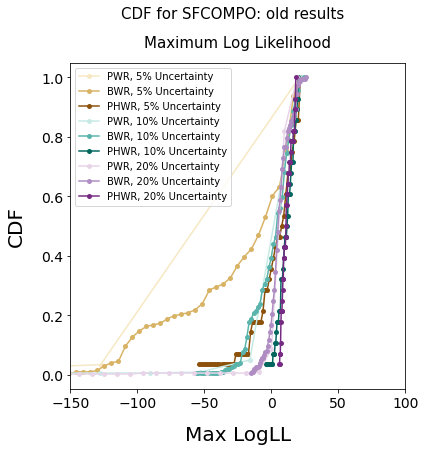

<Figure size 432x288 with 0 Axes>

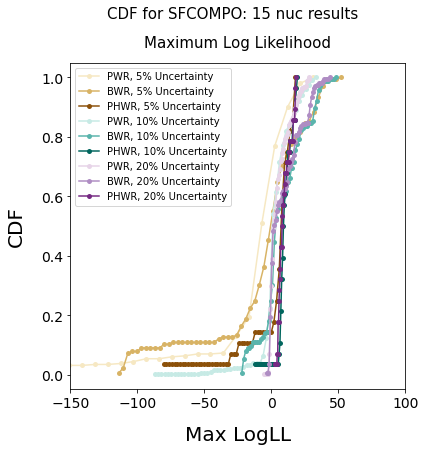

<Figure size 432x288 with 0 Axes>

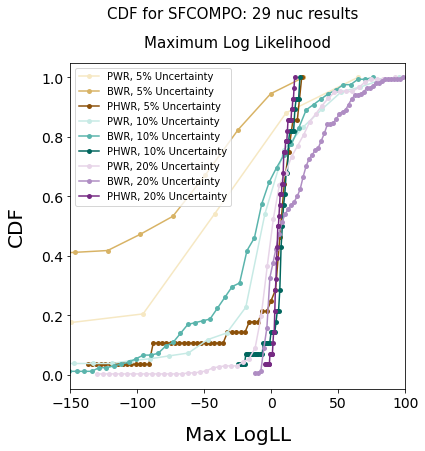

In [28]:
plot_rxtr_cdfs('sfco', 'MaxLogLL')
plot_rxtr_cdfs('sfco15', 'MaxLogLL')
plot_rxtr_cdfs('sfco29', 'MaxLogLL')

<Figure size 432x288 with 0 Axes>

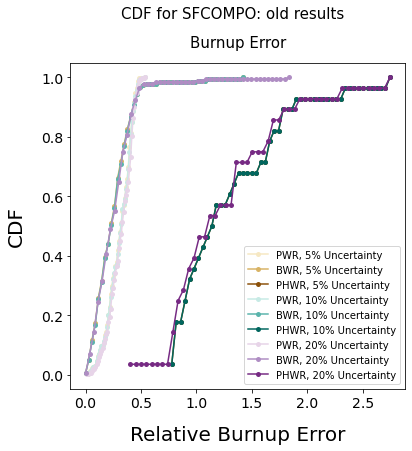

<Figure size 432x288 with 0 Axes>

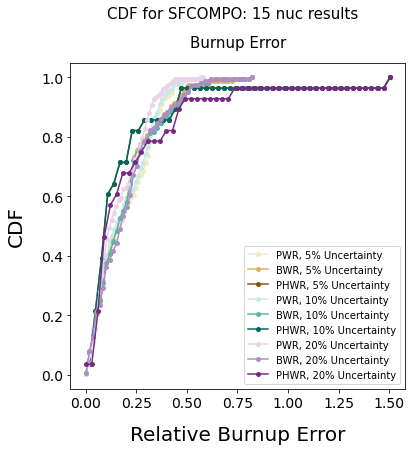

<Figure size 432x288 with 0 Axes>

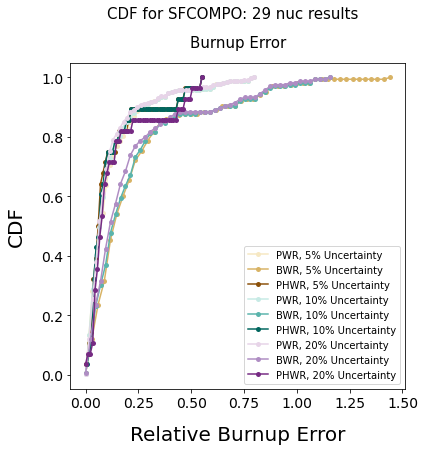

In [30]:
plot_rxtr_cdfs('sfco', 'Percent_Burnup_Error')
plot_rxtr_cdfs('sfco15', 'Percent_Burnup_Error')
plot_rxtr_cdfs('sfco29', 'Percent_Burnup_Error')

<Figure size 432x288 with 0 Axes>

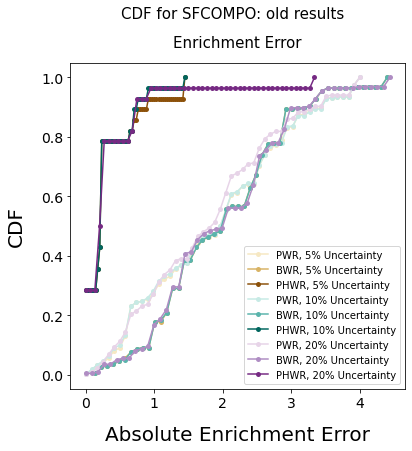

<Figure size 432x288 with 0 Axes>

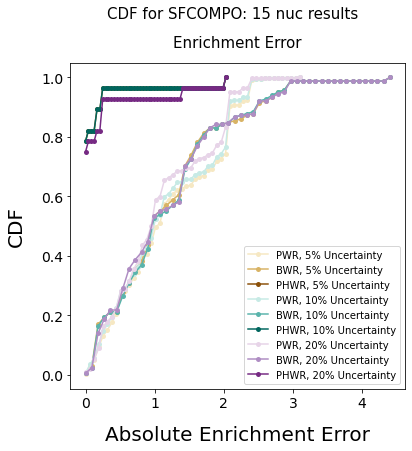

<Figure size 432x288 with 0 Axes>

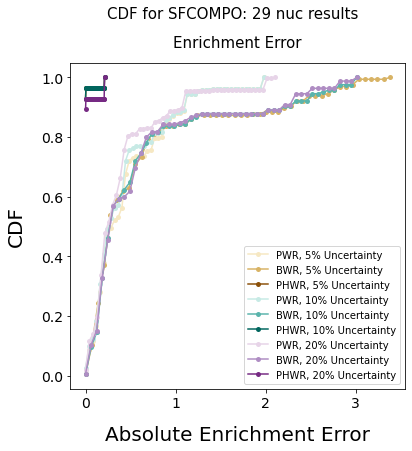

In [31]:
plot_rxtr_cdfs('sfco', 'Enrichment_Error')
plot_rxtr_cdfs('sfco15', 'Enrichment_Error')
plot_rxtr_cdfs('sfco29', 'Enrichment_Error')

## CDFs of select predictions with metric = LL - MaxLL

In [39]:
CDF_percentiles = [0.9998, 0.9988, 0.95, 0.9, 0.5, 0.1, 0.01]
CDF_names = ['CDF_LogLL_' + str(x) for x in CDF_percentiles]

In [73]:
def plot_cdfs(idx, dfname, ll_percentile):

    df0 = dfs[dfname + '_0']
    df1 = dfs[dfname + '_1']
    df2 = dfs[dfname + '_2']
    df3 = dfs[dfname + '_3']
    
    cdf0 = [df0['MaxLogLL'].iloc[idx]] + [df0[name].iloc[idx] for name in CDF_names]#, df0['2ndMaxLogLL'].iloc[idx]
    cdf1 = [df1['MaxLogLL'].iloc[idx]] + [df1[name].iloc[idx] for name in CDF_names]#, df1['2ndMaxLogLL'].iloc[idx]
    cdf2 = [df2['MaxLogLL'].iloc[idx]] + [df2[name].iloc[idx] for name in CDF_names]#, df2['2ndMaxLogLL'].iloc[idx]
    cdf3 = [df3['MaxLogLL'].iloc[idx]] + [df3[name].iloc[idx] for name in CDF_names]#, df3['2ndMaxLogLL'].iloc[idx]
    
    #max2_quantile = (len(df0) - 1) / len(df0)
    y = [1] + CDF_percentiles#, max2_quantile
    x0 = [(x - df0['MaxLogLL'].iloc[idx]) for x in cdf0]
    x1 = [(x - df1['MaxLogLL'].iloc[idx]) for x in cdf1]
    x2 = [(x - df2['MaxLogLL'].iloc[idx]) for x in cdf2]
    x3 = [(x - df3['MaxLogLL'].iloc[idx]) for x in cdf3]
    
    plt.clf()
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    
    ax.plot(x0, y, 'o-', color=colors['MBrwn'], mew=0, ms=5, label="5% Uncertainty")
    ax.plot(x1, y, 'o-', color=colors['MTeal'], mew=0, ms=5, label="10% Uncertainty")
    ax.plot(x2, y, 'o-', color=colors['MPurp'], mew=0, ms=5, label="15% Uncertainty")
    ax.plot(x3, y, 'o-', color=colors['DBrwn'], mew=0, ms=5, label="20% Uncertainty")
    
    ax.set_xlabel('LL - Max LL', fontsize=20, labelpad=15)
    ax.set_ylabel('CDF', fontsize=20, labelpad=15)
    #ax.set_xlim(-500000, 10000)
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')#'right', bbox_to_anchor=(1.4, 0.5))
    
    title_str = 'CDF for prediction of idx ' + str(idx)
    subtitle_str = 'Max LL percentile wrt entire DB of preds: ' + str(ll_percentile * 100)
    #plt.suptitle(title_str, y=1.01, fontsize=20)
    #plt.title(subtitle_str, fontsize=15, pad=15)
    plt.title(title_str, fontsize=20, pad=15)
    plt.show()
    
    fig.savefig('../plots/cdf_' + dfname + '_idx' + str(idx) + '.png', bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

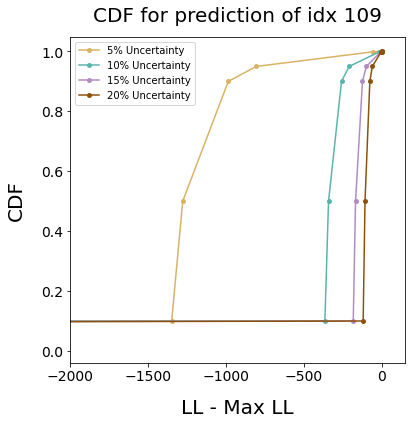

In [67]:
plot_cdfs(109, 'sfco15', 1)

<Figure size 432x288 with 0 Axes>

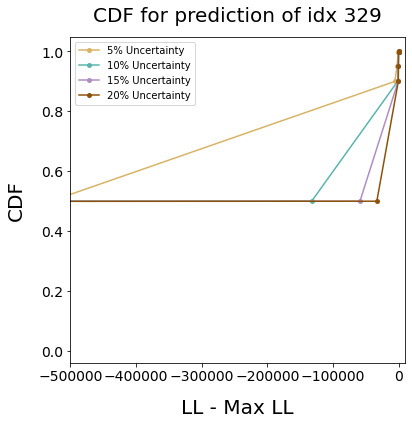

In [74]:
plot_cdfs(329, 'sfco29', 1)

In [32]:
quants = [1, 0.99, 0.98, 0.97]
def percentile_idxs(quants, df):
    idxs = []
    for q in quants:
        max_ll_pred = df['MaxLogLL'].quantile(q, interpolation='higher')
        idxs.append(df.loc[df['MaxLogLL'] == max_ll_pred].index[0])
        print(max_ll_pred)
    print(idxs)
    return idxs
idxs_to_plot = percentile_idxs(quants, dfs['sfco15_0'])
idxs_to_plot = percentile_idxs(quants, dfs['sfco29_0'])

52.071184917818854
38.358901758924155
36.57799440543933
33.73894370631194
[109, 116, 121, 120]
64.66577362251023
41.77276746242413
30.30496982840393
26.52209957401324
[329, 100, 335, 334]


In [33]:
dfs['sfco15_0'].iloc[109]

Unnamed: 0                                                    0
Unnamed: 0.1                                                  0
sim_idx                               JPD-1|A-20|C3|KC-1333-660
ReactorType                                                 bwr
CoolingTime                                                   0
Enrichment                                                  2.6
Burnup                                                     2185
OrigenReactor           Japan Power Demonstration Reactor-1_BWR
pred_idx                                                  30319
pred_ReactorType                                            bwr
pred_CoolingTime                                        1520.46
pred_Enrichment                                            2.74
pred_Burnup                                             1979.95
pred_OrigenReactor                                      ge7x7-0
AvgPowerDensity                                              10
ModDensity                              

In [34]:
dfs['sfco29_0'].iloc[329]

Unnamed: 0                                    0
Unnamed: 0.1                                  0
sim_idx                     TMI-1|NJ070G|O12|S4
ReactorType                                 pwr
CoolingTime                                   0
Enrichment                                 4.66
Burnup                                    23700
OrigenReactor           Three Mile Island-1_PWR
pred_idx                                 285255
pred_ReactorType                            pwr
pred_CoolingTime                        1270.35
pred_Enrichment                            4.52
pred_Burnup                             23544.6
pred_OrigenReactor                       w17x17
AvgPowerDensity                              35
ModDensity                                 0.71
UiWeight                                      1
MaxLogLL                                64.6658
MaxLLUnc                                14.6626
2ndMaxLogLL                              47.109
2ndMaxLLUnc                             

# Scatter Plots

In [75]:
def plot_scatter(dfname, metric):
    
    df0 = dfs[dfname + '_0']
    df1 = dfs[dfname + '_1']
    df2 = dfs[dfname + '_2']
    df3 = dfs[dfname + '_3']
    
    rel_err = 'Percent_' + metric + '_Error' 
    x0, y0 = df0[rel_err], df0[metric]
    x1, y1 = df1[rel_err], df1[metric]
    x2, y2 = df2[rel_err], df2[metric]
    x3, y3 = df3[rel_err], df3[metric]
    
    plt.clf()
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    
    ax.scatter(x0, y0, s=5, color=colors['MBrwn'], label="5% Uncertainty")
    #ax.scatter(x1, y1, s=5, color=colors['MTeal'], label="10% Uncertainty")
    #ax.scatter(x2, y2, s=5, color=colors['MPurp'], label="15% Uncertainty")
    ax.scatter(x3, y3, s=5, color=colors['DBrwn'], label="20% Uncertainty")
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')#'right', bbox_to_anchor=(1.4, 0.5))    
    
    title_dict = {'Burnup': ['Relative Burnup Error', 'Known Burnup [MWd/THM]'], 
                  }
    dftitle = {'sfco': 'SFCOMPO: old results', 'sfco15': 'SFCOMPO: 15 nuc results', 
               'sfco29' : 'SFCOMPO: 29 nuc results'}

    ax.set_xlabel(title_dict[metric][0], fontsize=20, labelpad=15)
    ax.set_ylabel(title_dict[metric][1], fontsize=20, labelpad=15)
    
    title_str = metric + ' Scatterplot'
    subtitle_str = dftitle[dfname] + ' predictions'
    plt.suptitle(title_str, y=1.01, fontsize=15)
    plt.title(subtitle_str, fontsize=15, pad=15)
    
    #ax.set_xlim(0, 250)
    plt.show()
    
    #fig.savefig('../plots/burnerr_scatter_' + dfname + '.png', bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

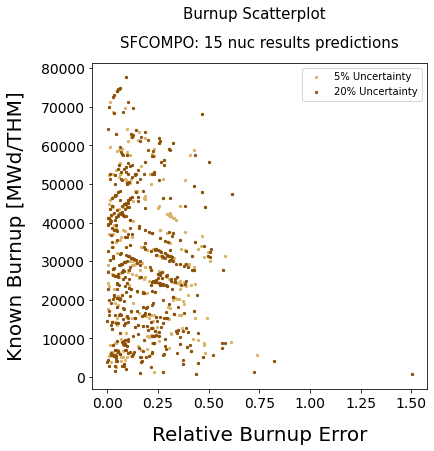

In [76]:
plot_scatter('sfco15', 'Burnup')

<Figure size 432x288 with 0 Axes>

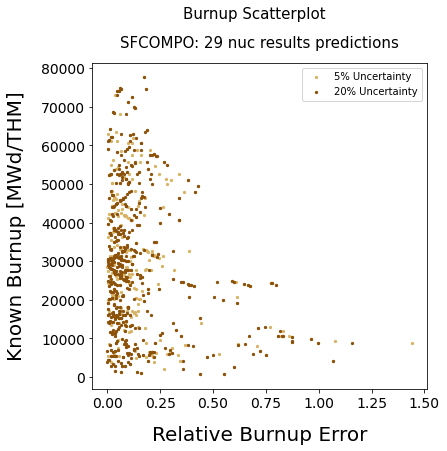

In [77]:
plot_scatter('sfco29', 'Burnup')

# Heatmaps

## MLL Heatmap

In [78]:
def plot_heatmap(i, dfname):
    df = dfs[dfname + '_' + str(i)]
    
    plt.clf()
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    
    vmin = 0
    vmax = df['MaxLogLL'].max()
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    
    x = df['Burnup']
    y = df['Enrichment']
    triang = tri.Triangulation(x, y)
    z = df['MaxLogLL']
    
    surf = ax.tripcolor(triang, z, norm=norm, cmap=cm.viridis, shading='gouraud')
    
    ax.set_title(str(int(uncs[i]*100)) + '% Uncertainty', fontsize=20, pad=15)
    ax.set_xlabel('Burnup [MWd/MTHM]', fontsize=20, labelpad=15)
    ax.set_ylabel('Enrichment [%U235]', fontsize=20, labelpad=15)
    #ax.set_ylabel('Cooling Time [days]', fontsize=20, labelpad=15)
    
    cbar = fig.colorbar(surf)
    cbar.ax.set_ylabel('LogLikelihood', size=20, labelpad=15)
    ax.tick_params(labelsize=14)
    cbar.ax.tick_params(labelsize=14)
    plt.show()
    
    dftitle = {'sfco': 'SFCOMPO: old results', 'sfco15': 'SFCOMPO: 15 nuc results', 
               'sfco29' : 'SFCOMPO: 29 nuc results'}
    #fig.savefig('../plots/mll_heatmap_' + dftitle[dfname] + str(i) + '_unc' + str(uncs[i]) + '.png', bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

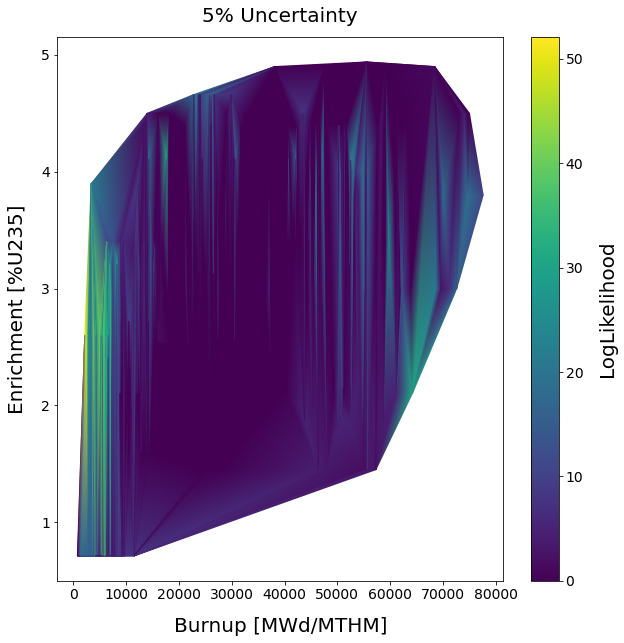

<Figure size 432x288 with 0 Axes>

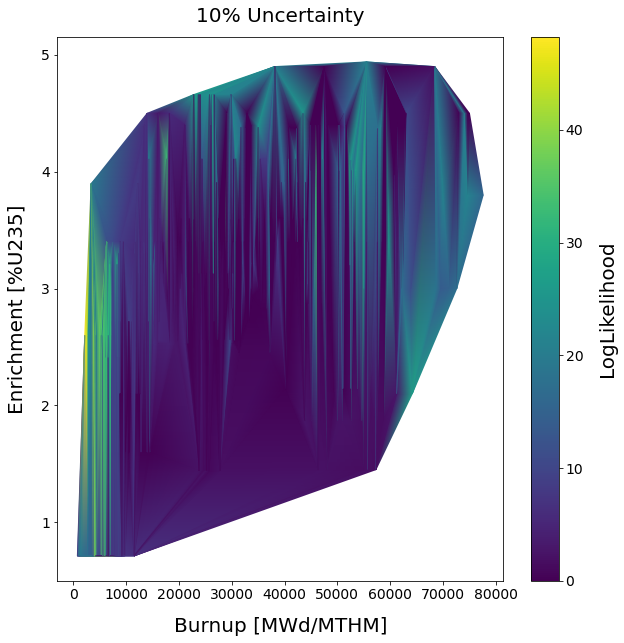

<Figure size 432x288 with 0 Axes>

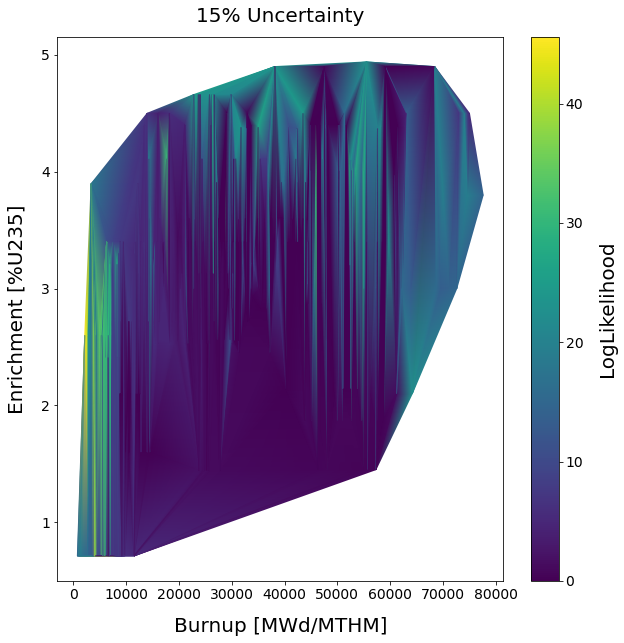

<Figure size 432x288 with 0 Axes>

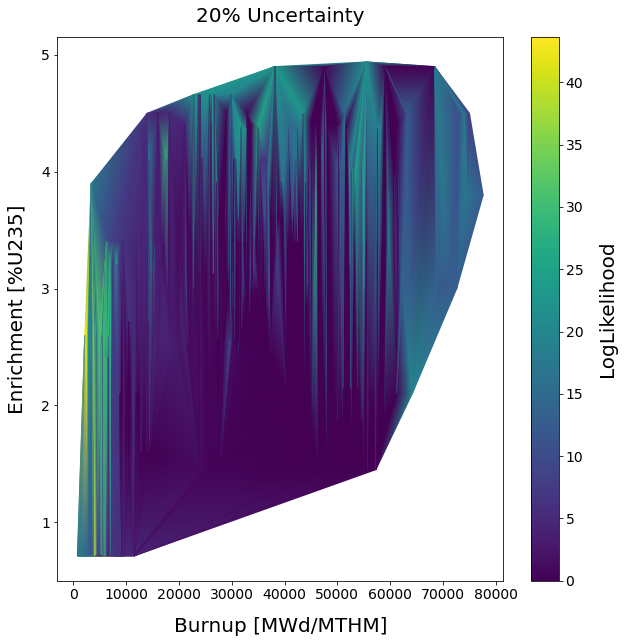

In [79]:
for i in range(0, 4):
    plot_heatmap(i, 'sfco15')

<Figure size 432x288 with 0 Axes>

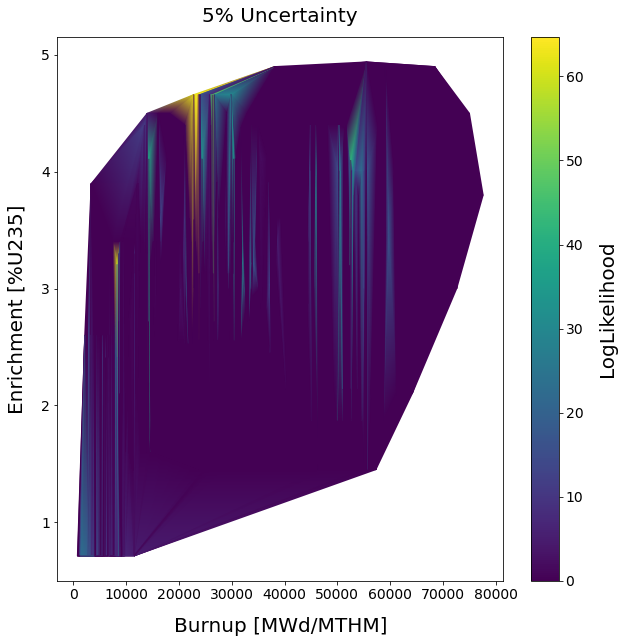

<Figure size 432x288 with 0 Axes>

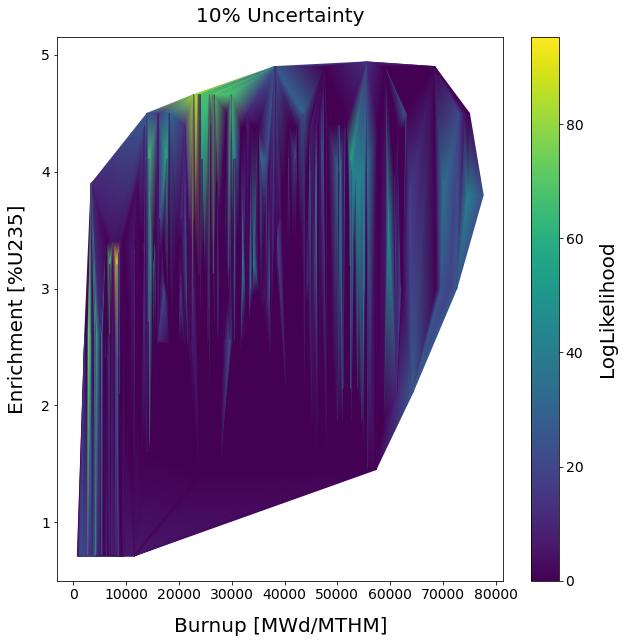

<Figure size 432x288 with 0 Axes>

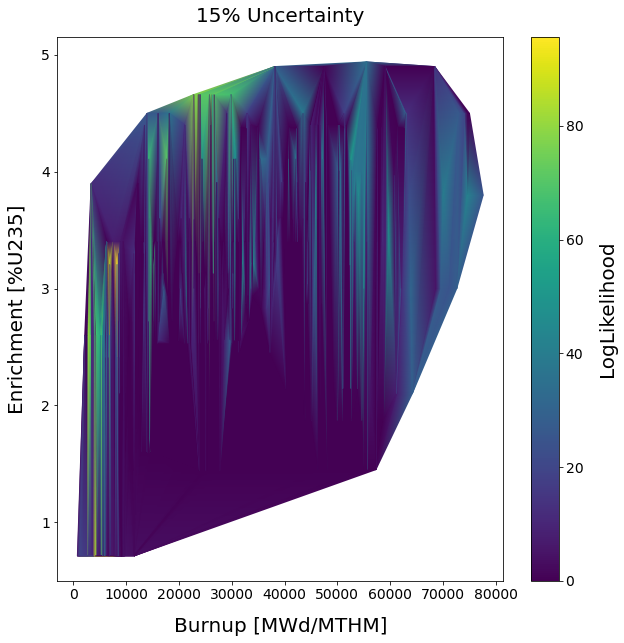

<Figure size 432x288 with 0 Axes>

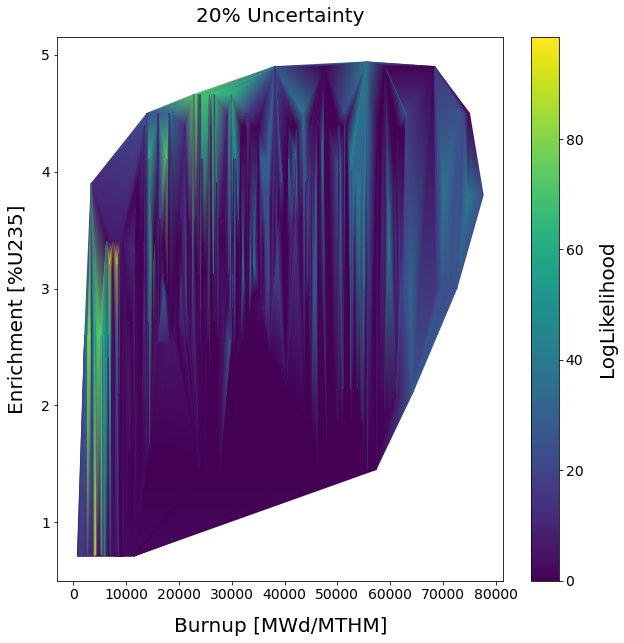

In [80]:
for i in range(0, 4):
    plot_heatmap(i, 'sfco29')

## Error Heatmaps

In [84]:
def plot_err_heatmap(i, dfname, error):
    df = dfs[dfname + '_' + str(i)]
    
    plt.clf()
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    
    vmin = 0
    vmax = df[error].max()
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    
    x = df['Burnup']
    y = df['Enrichment']
    triang = tri.Triangulation(x, y)
    z = df[error]
    
    surf = ax.tripcolor(triang, z, norm=norm, cmap=cm.viridis, shading='gouraud')
    
    ax.set_title(str(int(uncs[i]*100)) + '% Uncertainty', fontsize=20, pad=15)
    ax.set_xlabel('Burnup [MWd/MTHM]', fontsize=20, labelpad=15)
    ax.set_ylabel('Enrichment [%U235]', fontsize=20, labelpad=15)
    
    cbar = fig.colorbar(surf)
    cbar.ax.set_ylabel('Absolute ' + error, size=20, labelpad=15)
    ax.tick_params(labelsize=14)
    cbar.ax.tick_params(labelsize=14)
    plt.show()
    
    dftitle = {'sfco': 'SFCOMPO: old results', 'sfco15': 'SFCOMPO: 15 nuc results', 
               'sfco29' : 'SFCOMPO: 29 nuc results'}
    #fig.savefig('../plots/burnerr_heatmap_' + dftitle[dfname] + str(i) + '_unc' + str(uncs[i]) + '.png', bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

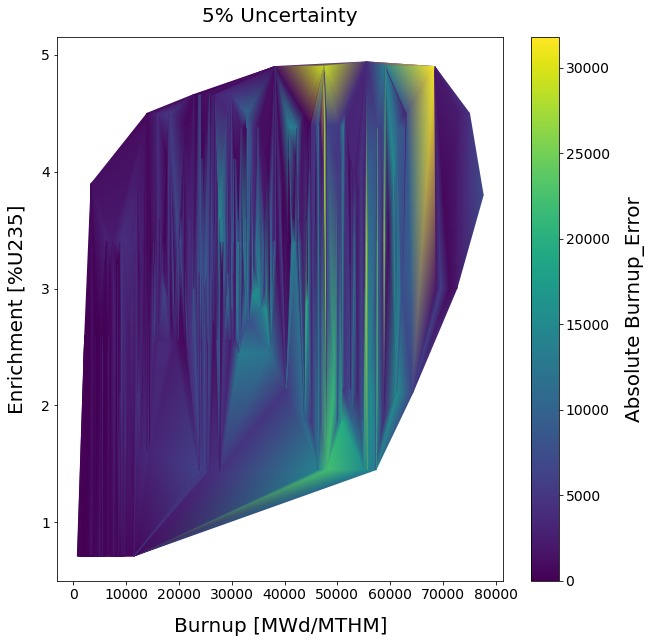

<Figure size 432x288 with 0 Axes>

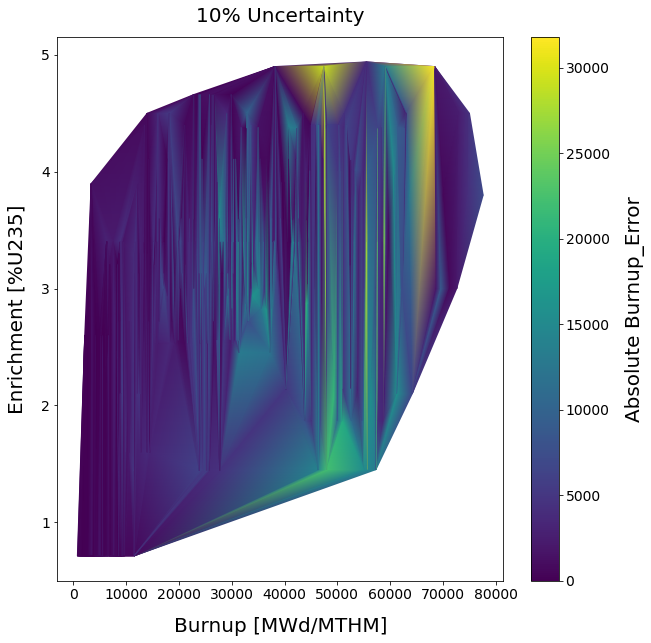

<Figure size 432x288 with 0 Axes>

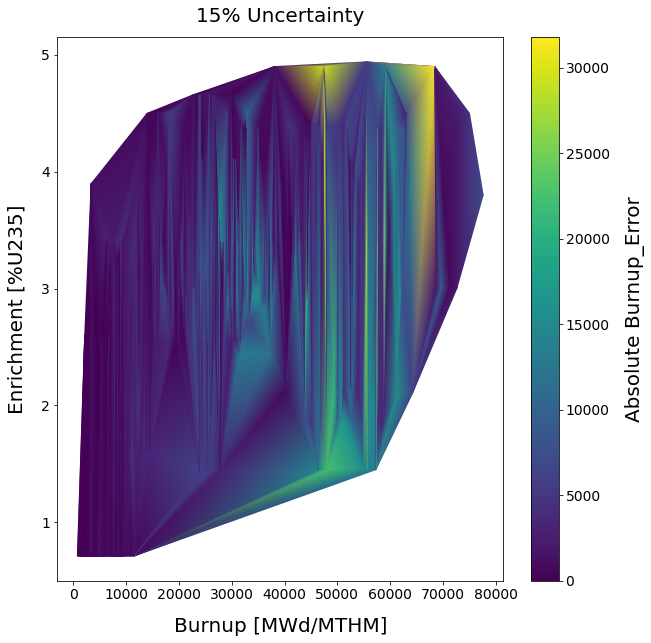

<Figure size 432x288 with 0 Axes>

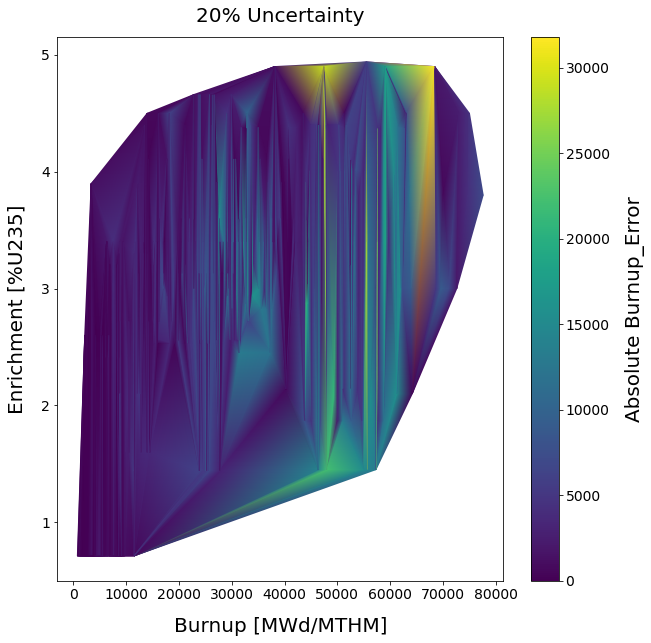

In [85]:
error = 'Burnup_Error'
for i in range(0, 4):
    plot_err_heatmap(i, 'sfco15', error)

<Figure size 432x288 with 0 Axes>

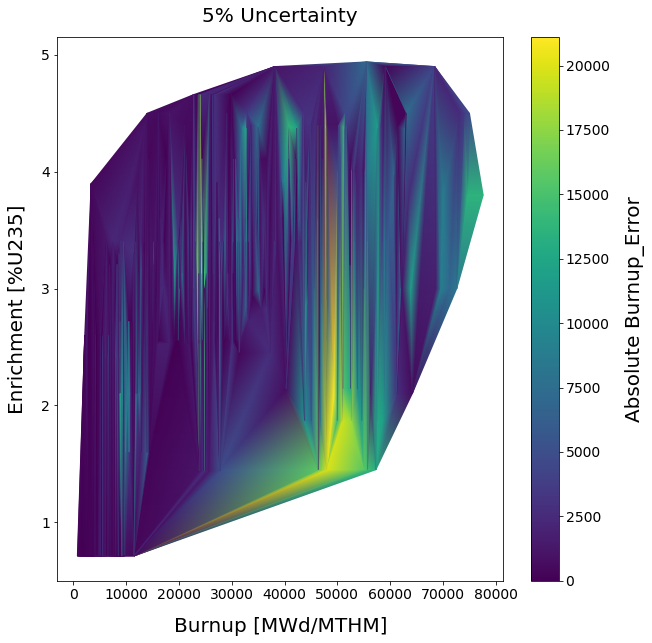

<Figure size 432x288 with 0 Axes>

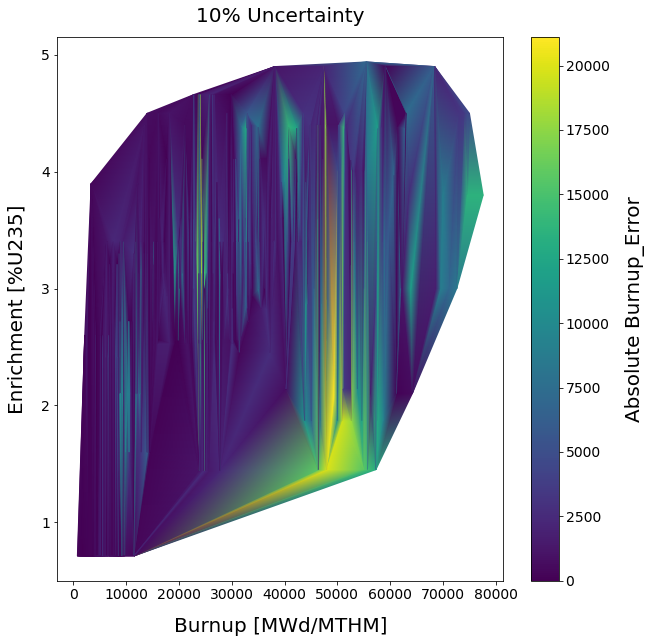

<Figure size 432x288 with 0 Axes>

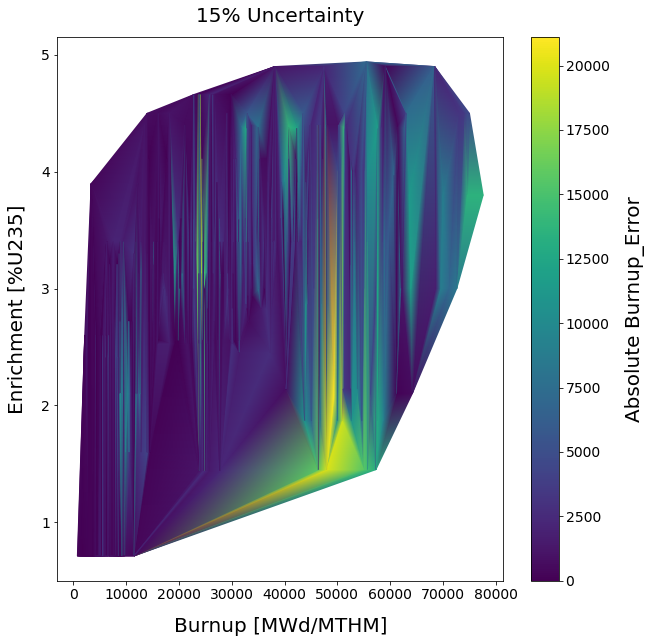

<Figure size 432x288 with 0 Axes>

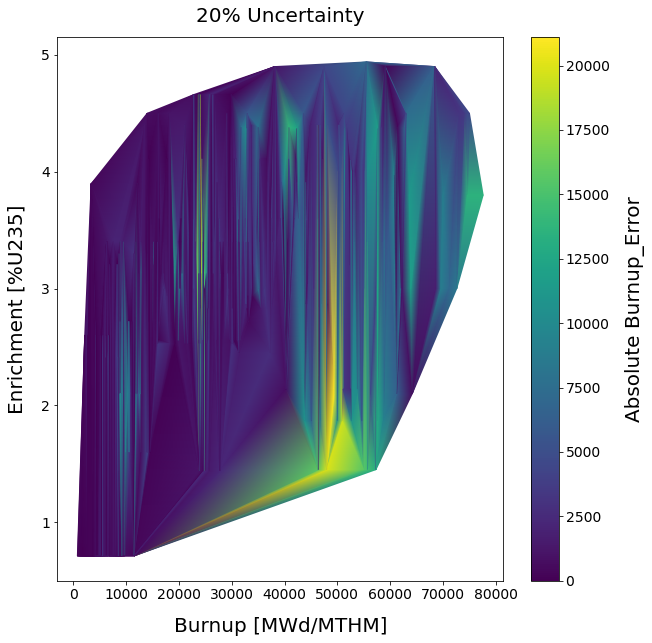

In [86]:
for i in range(0, 4):
    plot_err_heatmap(i, 'sfco29', error)

<Figure size 432x288 with 0 Axes>

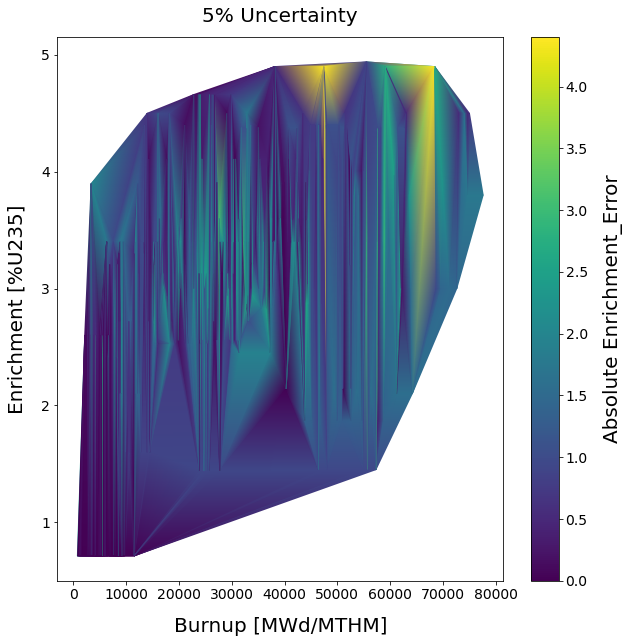

<Figure size 432x288 with 0 Axes>

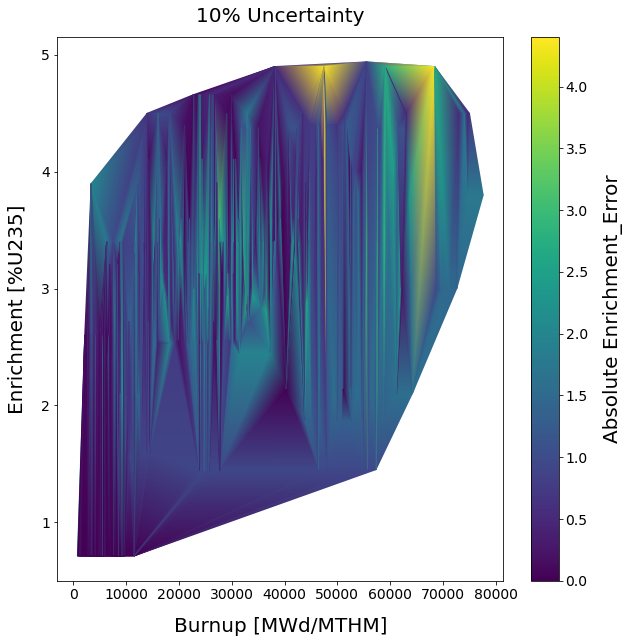

<Figure size 432x288 with 0 Axes>

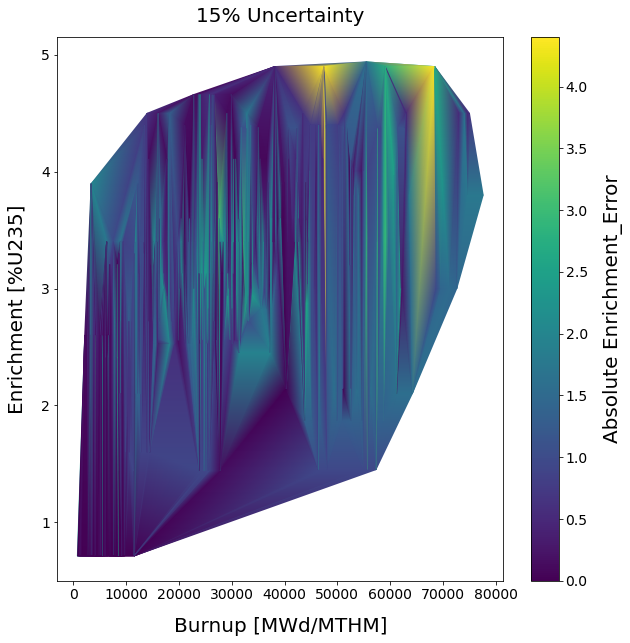

<Figure size 432x288 with 0 Axes>

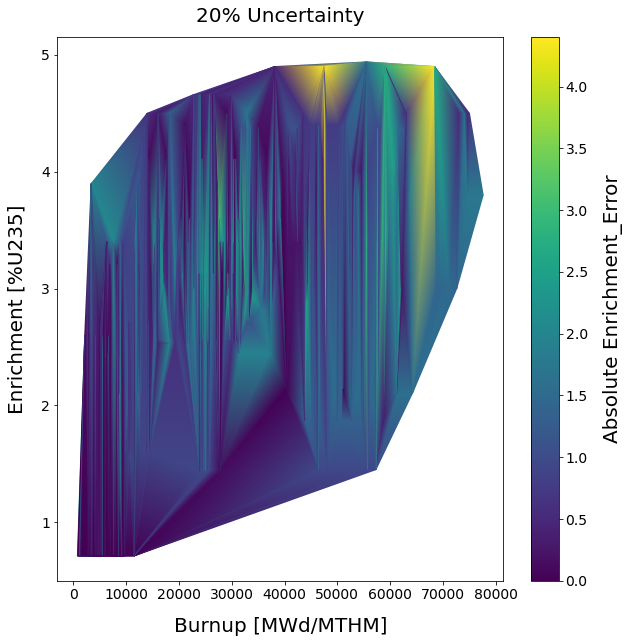

In [87]:
error = 'Enrichment_Error'
for i in range(0, 4):
    plot_err_heatmap(i, 'sfco15', error)

<Figure size 432x288 with 0 Axes>

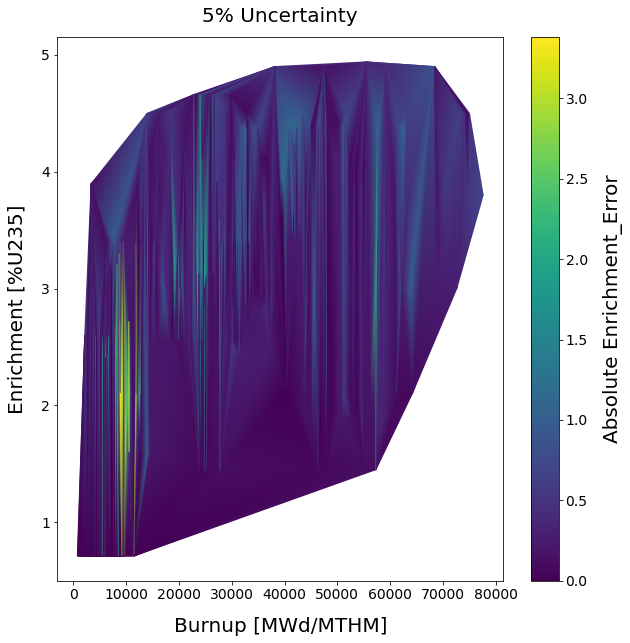

<Figure size 432x288 with 0 Axes>

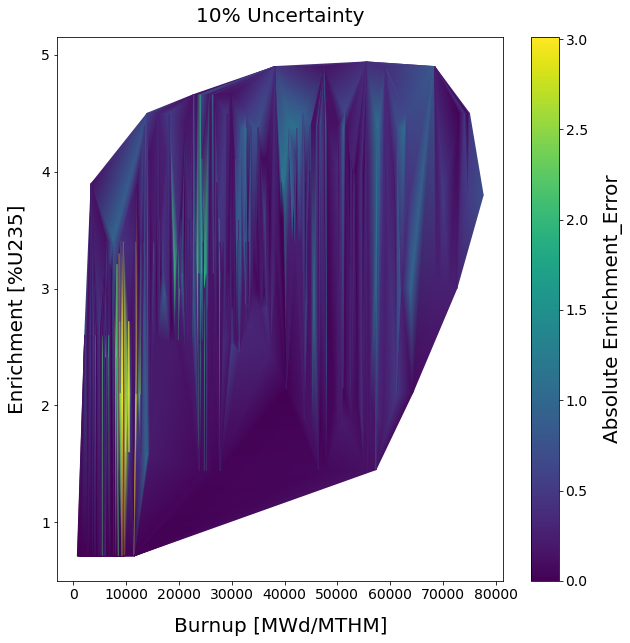

<Figure size 432x288 with 0 Axes>

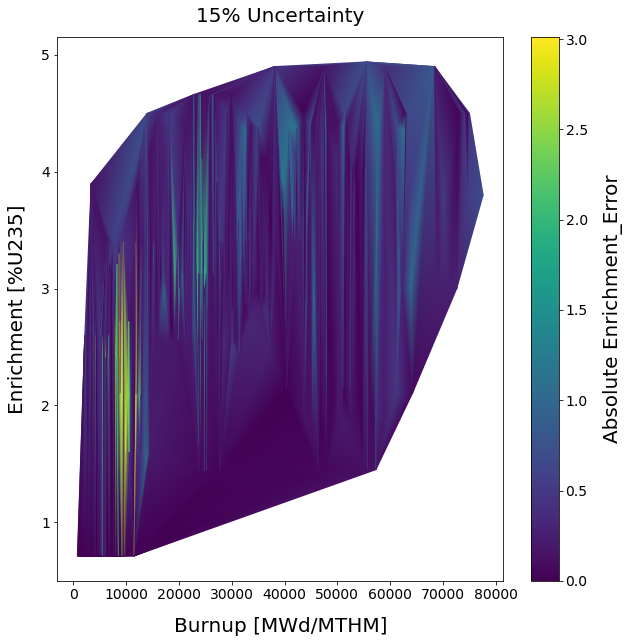

<Figure size 432x288 with 0 Axes>

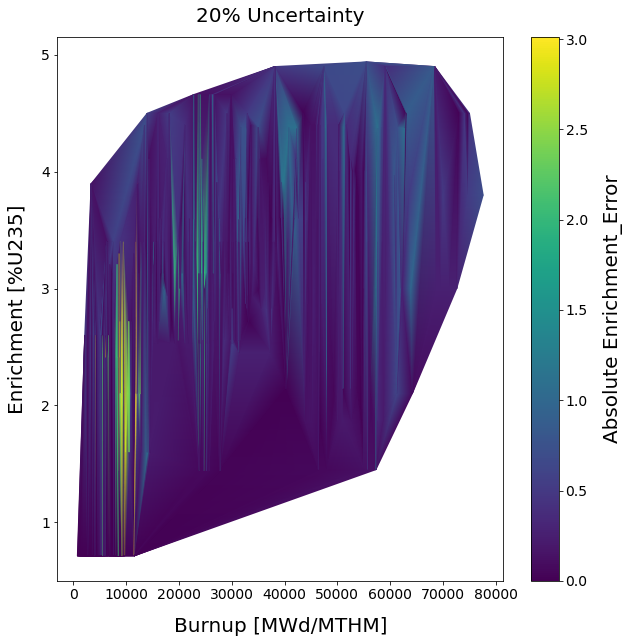

In [88]:
for i in range(0, 4):
    plot_err_heatmap(i, 'sfco29', error)